In [1]:
import os, sys
import numpy as np
import h5netcdf

import xarray as xr
import xarray.ufuncs as xu
import pandas as pd

from matplotlib import pyplot as plt

import cartopy.crs as ccrs
import cartopy

plt.rc("figure", figsize=(16,4))
plt.rc("font", size=14)
ccrs.PlateCarree()

from dask.distributed import Client, LocalCluster
cluster = LocalCluster(processes=False, n_workers=1, threads_per_worker=4)
client = Client(cluster)
client



/home/durandy/miniconda3/envs/towel/lib/python3.9/site-packages/distributed/node.py:160: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 35981 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://137.129.155.67:35981/status,
Dashboard: http://137.129.155.67:35981/status,Workers: 1
Total threads: 4,Total memory: 78.61 GiB
Status: running,Using processes: False
Comm: inproc://137.129.155.67/5490/1,Workers: 1
Dashboard: http://137.129.155.67:35981/status,Total threads: 4
Started: Just now,Total memory: 78.61 GiB
Comm: inproc://137.129.155.67/5490/4,Total threads: 4
Dashboard: http://137.129.155.67:35497/status,Memory: 78.61 GiB
Nanny: None,


In [3]:
indir_data_FILTERED = '/cnrm/tropics/commun/DATACOMMUN/WAVE/NO_SAVE/DATA/ANALYSIS/VARIANCE/ANOMALY_FILTERED/'

ds = xr.open_mfdataset(indir_data_FILTERED + 'OLR_YEAR.nc', chunks = {'time' : 1}, parallel = True)

ds

<xarray.Dataset>
Dimensions:     (lat: 60, lon: 360)
Coordinates:
  * lat         (lat) float32 -29.5 -28.5 -27.5 -26.5 ... 26.5 27.5 28.5 29.5
  * lon         (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
Data variables:
    OLR_Kelvin  (lat, lon) float64 dask.array<chunksize=(60, 360), meta=np.ndarray>
    OLR_Rossby  (lat, lon) float64 dask.array<chunksize=(60, 360), meta=np.ndarray>
    OLR_MJO     (lat, lon) float64 dask.array<chunksize=(60, 360), meta=np.ndarray>
    OLR_MRG     (lat, lon) float64 dask.array<chunksize=(60, 360), meta=np.ndarray>
    OLR_EIG     (lat, lon) float64 dask.array<chunksize=(60, 360), meta=np.ndarray>
    OLR_WIG     (lat, lon) float64 dask.array<chunksize=(60, 360), meta=np.ndarray>
    OLR_TD      (lat, lon) float64 dask.array<chunksize=(60, 360), meta=np.ndarray>
    OLR_LF      (lat, lon) float64 dask.array<chunksize=(60, 360), meta=np.ndarray>

In [4]:

ds_plot = ds


In [5]:
map_proj = ccrs.Mercator(central_longitude=180.0, 
                         min_latitude=-30.1, 
                         max_latitude=30.1,
                         globe=None)

# plt.rc("figure", figsize=(20,14))
cmap ='viridis'
vmin, vmax = -10, +10

colorbar = {'label': 'OLR $W^{2}.m^{-4}$',
            'orientation': 'vertical' ,
            'extend' : 'both'}


# Variance Annuelle de l'OLR filtré

In [6]:
vmax = 150.
levelsT = np.linspace(0,vmax,7)
levelsT

array([  0.,  25.,  50.,  75., 100., 125., 150.])

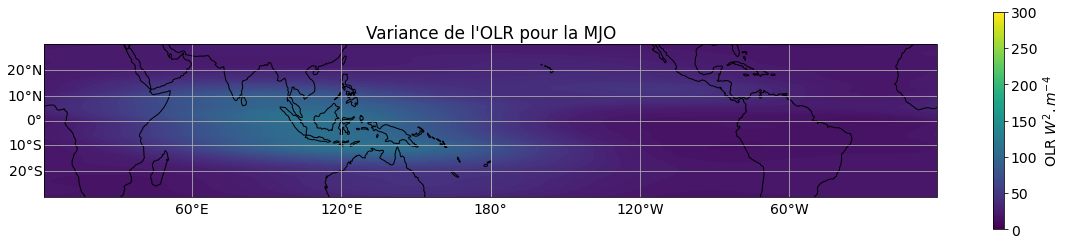

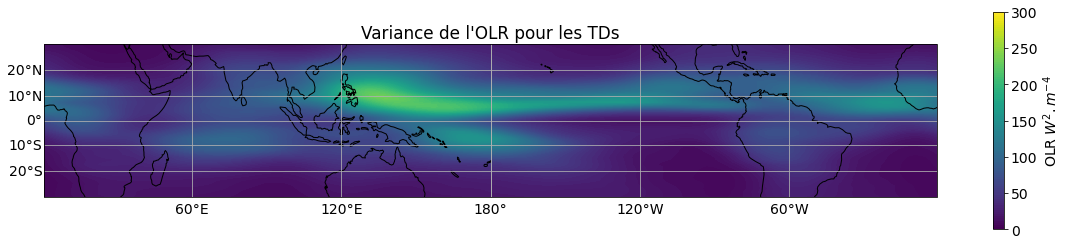

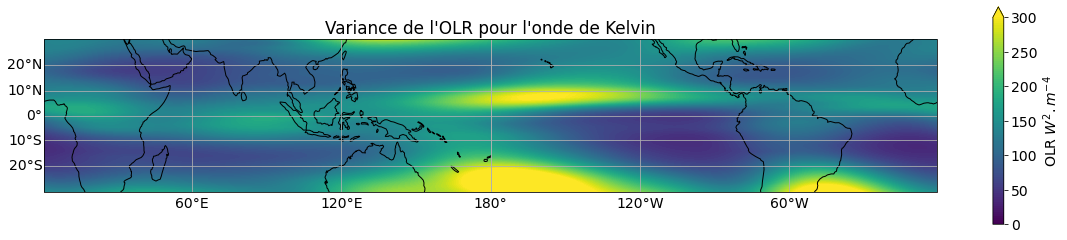

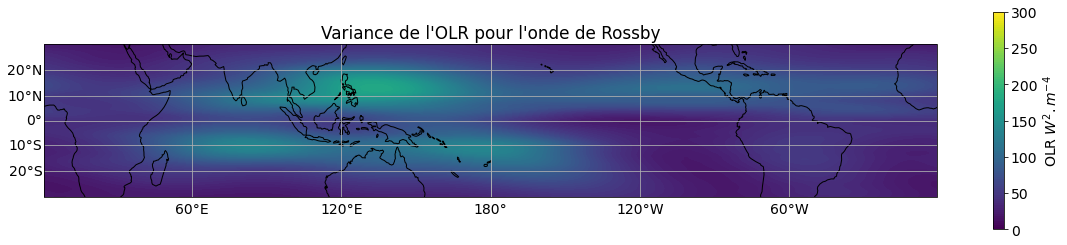

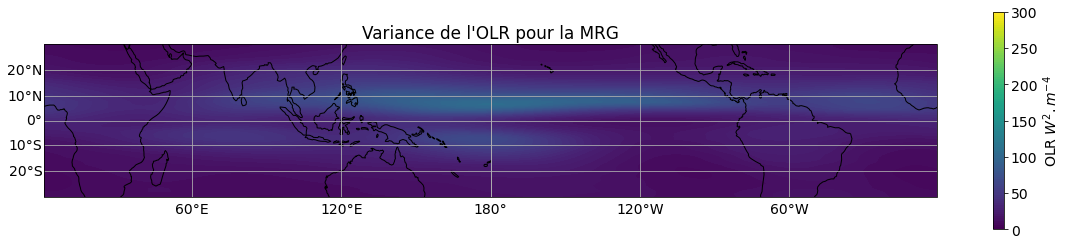

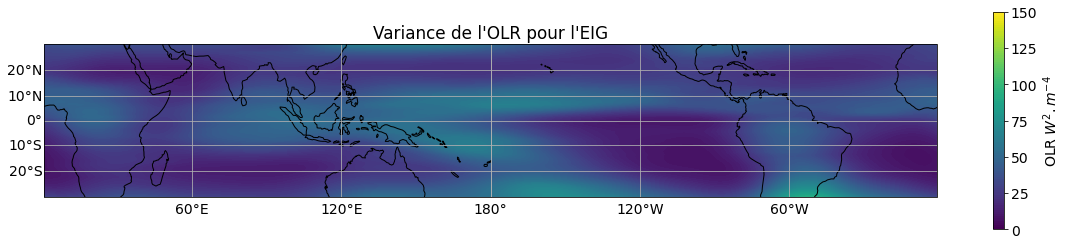

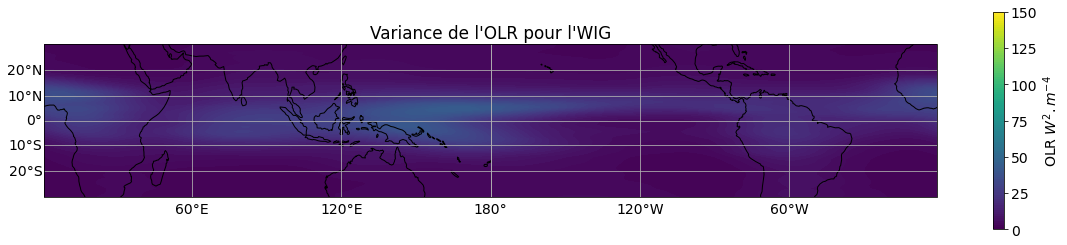

In [7]:
# plt.rc("figure", figsize=(20,14))
vmin, vmax = 0, 150*2
levelsT = np.linspace(0,vmax,7)
    
colorbar = {'label': 'OLR $W^{2}.m^{-4}$',
            'orientation': 'vertical' ,
            'extend' : 'both',
           'ticks': levelsT}
#####################################################################################
fig, axis = plt.subplots( 1, 1, 
    figsize=(20,4), subplot_kw={'projection': map_proj})

ds_plot['OLR_MJO'].plot.contourf(ax=axis, levels = 101, vmin = vmin, vmax = vmax,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap ,
                    cbar_kwargs=colorbar)

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title("Variance de l'OLR pour la MJO")

#####################################################################################

vmin, vmax = 0, 300

fig, axis = plt.subplots( 1, 1, 
    figsize=(20,4), subplot_kw={'projection': map_proj})

ds_plot['OLR_TD'].plot.contourf(ax=axis, levels = 101, vmin = vmin, vmax = vmax,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap ,
                    cbar_kwargs=colorbar)

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title("Variance de l'OLR pour les TDs")

#####################################################################################
# plt.rc("figure", figsize=(20,14))
vmin, vmax = 0, 300

fig, axis = plt.subplots( 1, 1, 
    figsize=(20,4), subplot_kw={'projection': map_proj})

ds_plot['OLR_Kelvin'].plot.contourf(ax=axis, levels = 101, vmin = vmin, vmax = vmax,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap ,
                    cbar_kwargs=colorbar)

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title("Variance de l'OLR pour l'onde de Kelvin")

#####################################################################################
# plt.rc("figure", figsize=(20,14))
vmin, vmax = 0, 300

fig, axis = plt.subplots( 1, 1, 
    figsize=(20,4), subplot_kw={'projection': map_proj})

ds_plot['OLR_Rossby'].plot.contourf(ax=axis, levels = 101, vmin = vmin, vmax = vmax,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap ,
                    cbar_kwargs=colorbar)

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title("Variance de l'OLR pour l'onde de Rossby")

#####################################################################################
# plt.rc("figure", figsize=(20,14))
vmin, vmax = 0, 300

fig, axis = plt.subplots( 1, 1, 
    figsize=(20,4), subplot_kw={'projection': map_proj})

ds_plot['OLR_MRG'].plot.contourf(ax=axis, levels = 101, vmin = vmin, vmax = vmax,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap ,
                    cbar_kwargs=colorbar)

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title("Variance de l'OLR pour la MRG")

#####################################################################################
# plt.rc("figure", figsize=(20,14))
vmin, vmax = 0, 150
levelsT = np.linspace(0,vmax,7)   
colorbar = {'label': 'OLR $W^{2}.m^{-4}$',
            'orientation': 'vertical' ,
            'extend' : 'both',
           'ticks': levelsT}


fig, axis = plt.subplots( 1, 1, 
    figsize=(20,4), subplot_kw={'projection': map_proj})

ds_plot['OLR_EIG'].plot.contourf(ax=axis, levels = 101, vmin = vmin, vmax = vmax,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap ,
                    cbar_kwargs=colorbar)

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title("Variance de l'OLR pour l'EIG")
# plt.show()

# plt.rc("figure", figsize=(20,14))
vmin, vmax = 0, 150

#####################################################################################
fig, axis = plt.subplots( 1, 1, 
    figsize=(20,4), subplot_kw={'projection': map_proj})

ds_plot['OLR_WIG'].plot.contourf(ax=axis, levels = 101, vmin = vmin, vmax = vmax,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap ,
                    cbar_kwargs=colorbar)

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title("Variance de l'OLR pour l'WIG")
plt.show()

# #####################################################

In [8]:
_ds_plot = xr.open_mfdataset(indir_data_FILTERED + 'OLR_JFM.nc', chunks = {'time' : 1}, parallel = True)

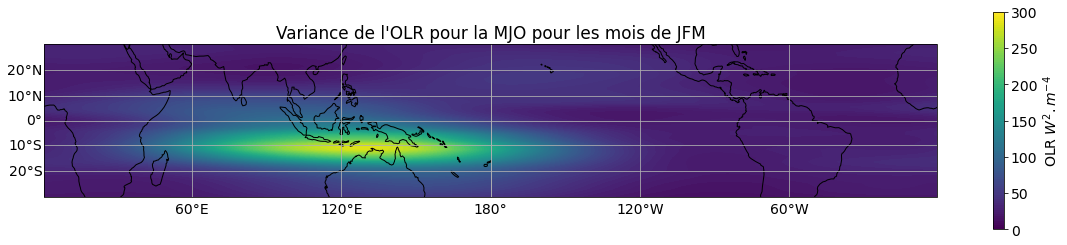

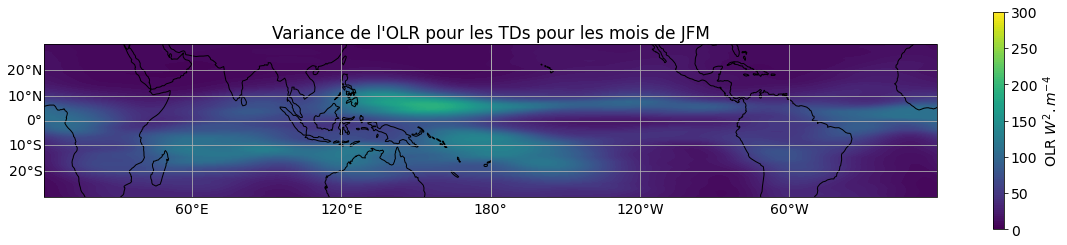

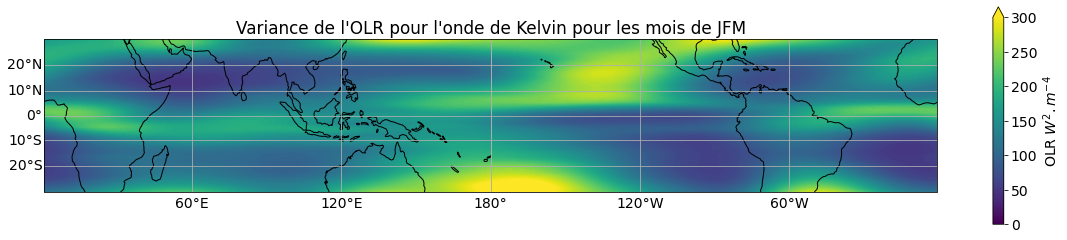

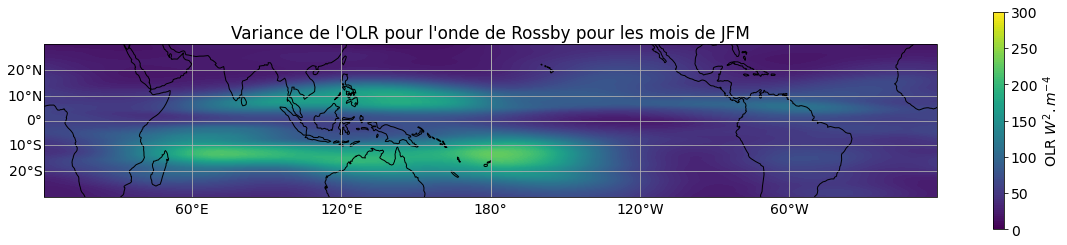

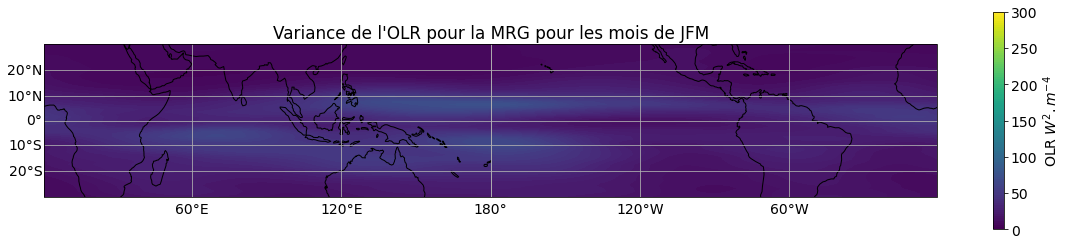

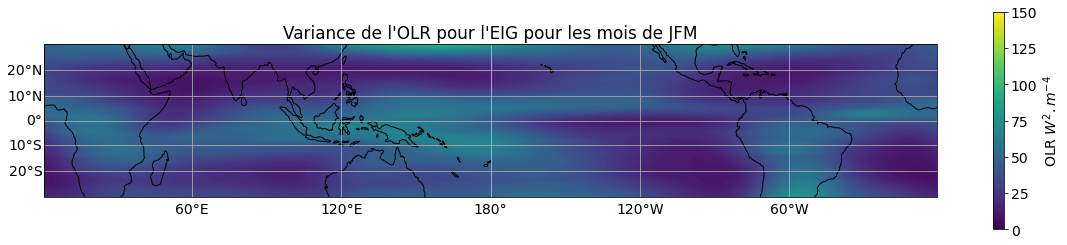

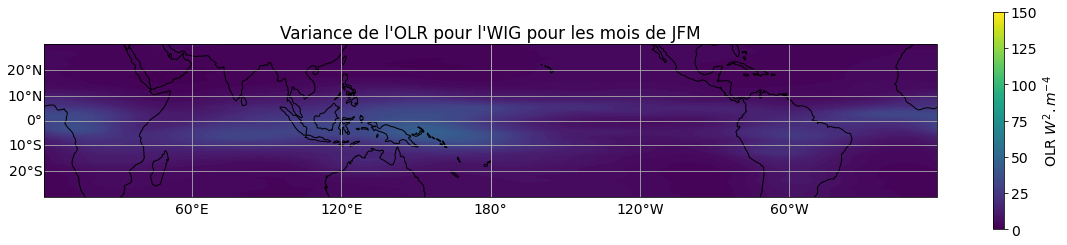

In [9]:
# plt.rc("figure", figsize=(20,14))
vmin, vmax = 0, 150*2
levelsT = np.linspace(0,vmax,7)
    
colorbar = {'label': 'OLR $W^{2}.m^{-4}$',
            'orientation': 'vertical' ,
            'extend' : 'both',
           'ticks': levelsT}
#####################################################################################
fig, axis = plt.subplots( 1, 1, 
    figsize=(20,4), subplot_kw={'projection': map_proj})

_ds_plot['OLR_MJO'].plot.contourf(ax=axis, levels = 101, vmin = vmin, vmax = vmax,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap ,
                    cbar_kwargs=colorbar)

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title("Variance de l'OLR pour la MJO pour les mois de JFM")

#####################################################################################
vmin, vmax = 0, 300

fig, axis = plt.subplots( 1, 1, 
    figsize=(20,4), subplot_kw={'projection': map_proj})

_ds_plot['OLR_TD'].plot.contourf(ax=axis, levels = 101, vmin = vmin, vmax = vmax,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap ,
                    cbar_kwargs=colorbar)

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title("Variance de l'OLR pour les TDs pour les mois de JFM")

#####################################################################################
# plt.rc("figure", figsize=(20,14))
vmin, vmax = 0, 300

fig, axis = plt.subplots( 1, 1, 
    figsize=(20,4), subplot_kw={'projection': map_proj})

_ds_plot['OLR_Kelvin'].plot.contourf(ax=axis, levels = 101, vmin = vmin, vmax = vmax,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap ,
                    cbar_kwargs=colorbar)

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title("Variance de l'OLR pour l'onde de Kelvin pour les mois de JFM")

#####################################################################################
# plt.rc("figure", figsize=(20,14))
vmin, vmax = 0, 300

fig, axis = plt.subplots( 1, 1, 
    figsize=(20,4), subplot_kw={'projection': map_proj})

_ds_plot['OLR_Rossby'].plot.contourf(ax=axis, levels = 101, vmin = vmin, vmax = vmax,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap ,
                    cbar_kwargs=colorbar)

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title("Variance de l'OLR pour l'onde de Rossby pour les mois de JFM")

#####################################################################################
vmin, vmax = 0, 300

fig, axis = plt.subplots( 1, 1, 
    figsize=(20,4), subplot_kw={'projection': map_proj})

_ds_plot['OLR_MRG'].plot.contourf(ax=axis, levels = 101, vmin = vmin, vmax = vmax,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap ,
                    cbar_kwargs=colorbar)

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title("Variance de l'OLR pour la MRG pour les mois de JFM")

#####################################################################################
vmin, vmax = 0, 150
levelsT = np.linspace(0,vmax,7)
    
colorbar = {'label': 'OLR $W^{2}.m^{-4}$',
            'orientation': 'vertical' ,
            'extend' : 'both',
           'ticks': levelsT}

fig, axis = plt.subplots( 1, 1, 
    figsize=(20,4), subplot_kw={'projection': map_proj})

_ds_plot['OLR_EIG'].plot.contourf(ax=axis, levels = 101, vmin = vmin, vmax = vmax,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap ,
                    cbar_kwargs=colorbar)

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title("Variance de l'OLR pour l'EIG pour les mois de JFM")
# plt.show()

#####################################################################################
vmin, vmax = 0, 150

fig, axis = plt.subplots( 1, 1, 
    figsize=(20,4), subplot_kw={'projection': map_proj})

_ds_plot['OLR_WIG'].plot.contourf(ax=axis, levels = 101, vmin = vmin, vmax = vmax,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap ,
                    cbar_kwargs=colorbar)

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title("Variance de l'OLR pour l'WIG pour les mois de JFM")
plt.show()

# #####################################################

In [10]:
_ds_plot = xr.open_mfdataset(indir_data_FILTERED + 'OLR_AMJ.nc', chunks = {'time' : 1}, parallel = True)

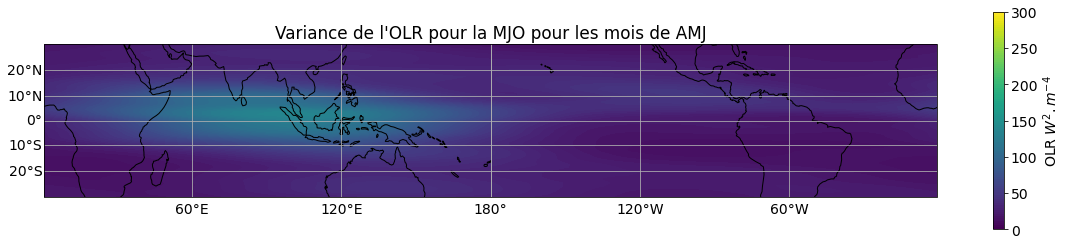

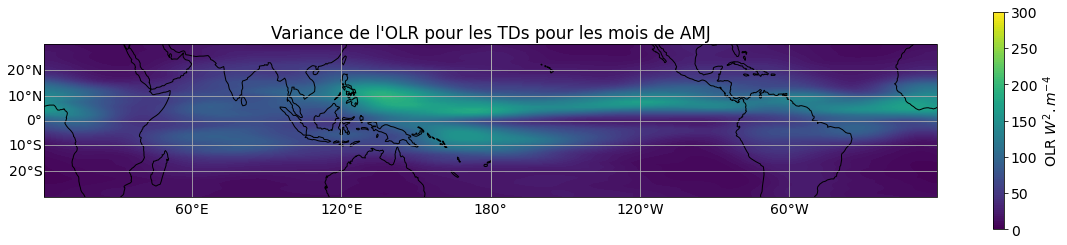

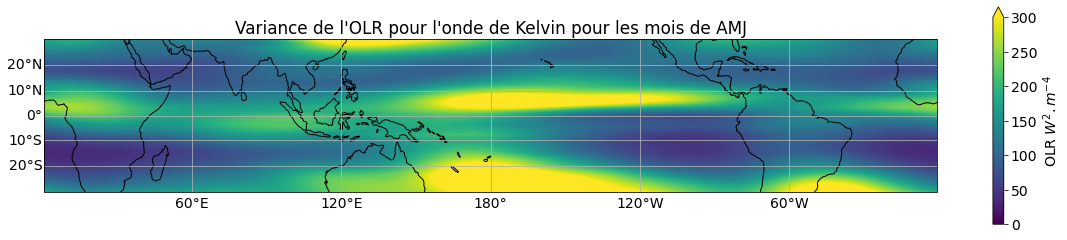

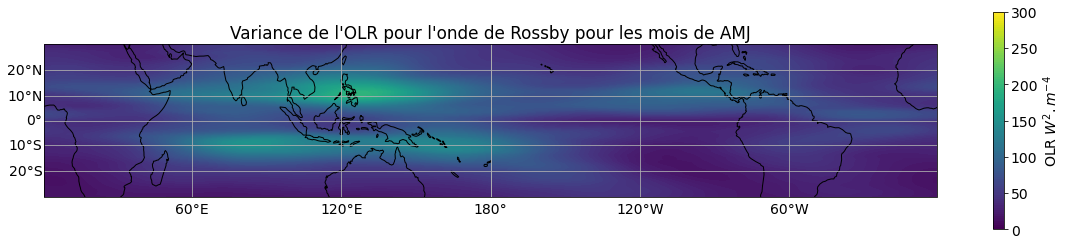

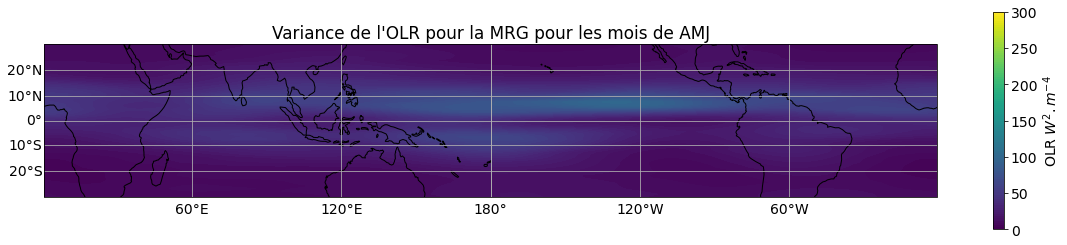

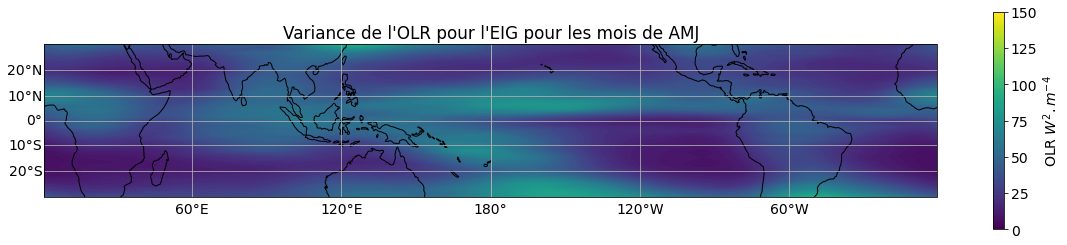

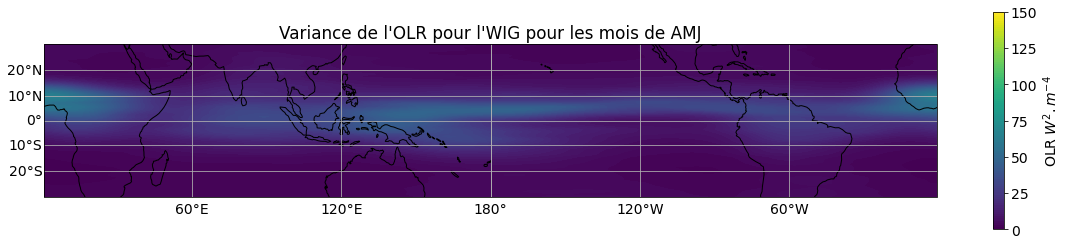

In [11]:
vmin, vmax = 0, 150*2
levelsT = np.linspace(0,vmax,7)
    
colorbar = {'label': 'OLR $W^{2}.m^{-4}$',
            'orientation': 'vertical' ,
            'extend' : 'both',
           'ticks': levelsT}
#####################################################################################
fig, axis = plt.subplots( 1, 1, 
    figsize=(20,4), subplot_kw={'projection': map_proj})

_ds_plot['OLR_MJO'].plot.contourf(ax=axis, levels = 101, vmin = vmin, vmax = vmax,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap ,
                    cbar_kwargs=colorbar)

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title("Variance de l'OLR pour la MJO pour les mois de AMJ")

#####################################################################################
# plt.rc("figure", figsize=(20,14))
vmin, vmax = 0, 300

fig, axis = plt.subplots( 1, 1, 
    figsize=(20,4), subplot_kw={'projection': map_proj})

_ds_plot['OLR_TD'].plot.contourf(ax=axis, levels = 101, vmin = vmin, vmax = vmax,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap ,
                    cbar_kwargs=colorbar)

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title("Variance de l'OLR pour les TDs pour les mois de AMJ")

#####################################################################################
# plt.rc("figure", figsize=(20,14))
vmin, vmax = 0, 300

fig, axis = plt.subplots( 1, 1, 
    figsize=(20,4), subplot_kw={'projection': map_proj})

_ds_plot['OLR_Kelvin'].plot.contourf(ax=axis, levels = 101, vmin = vmin, vmax = vmax,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap ,
                    cbar_kwargs=colorbar)

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title("Variance de l'OLR pour l'onde de Kelvin pour les mois de AMJ")

#####################################################################################
# plt.rc("figure", figsize=(20,14))
vmin, vmax = 0, 300

fig, axis = plt.subplots( 1, 1, 
    figsize=(20,4), subplot_kw={'projection': map_proj})

_ds_plot['OLR_Rossby'].plot.contourf(ax=axis, levels = 101, vmin = vmin, vmax = vmax,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap ,
                    cbar_kwargs=colorbar)

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title("Variance de l'OLR pour l'onde de Rossby pour les mois de AMJ")

#####################################################################################

# plt.rc("figure", figsize=(20,14))
vmin, vmax = 0, 300

fig, axis = plt.subplots( 1, 1, 
    figsize=(20,4), subplot_kw={'projection': map_proj})

_ds_plot['OLR_MRG'].plot.contourf(ax=axis, levels = 101, vmin = vmin, vmax = vmax,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap ,
                    cbar_kwargs=colorbar)

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title("Variance de l'OLR pour la MRG pour les mois de AMJ")

#####################################################################################
# plt.rc("figure", figsize=(20,14))
vmin, vmax = 0, 150
levelsT = np.linspace(0,vmax,7)
    
colorbar = {'label': 'OLR $W^{2}.m^{-4}$',
            'orientation': 'vertical' ,
            'extend' : 'both',
           'ticks': levelsT}

fig, axis = plt.subplots( 1, 1, 
    figsize=(20,4), subplot_kw={'projection': map_proj})

_ds_plot['OLR_EIG'].plot.contourf(ax=axis, levels = 101, vmin = vmin, vmax = vmax,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap ,
                    cbar_kwargs=colorbar)

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title("Variance de l'OLR pour l'EIG pour les mois de AMJ")
# plt.show()

#####################################################################################
# plt.rc("figure", figsize=(20,14))
vmin, vmax = 0, 150

fig, axis = plt.subplots( 1, 1, 
    figsize=(20,4), subplot_kw={'projection': map_proj})

_ds_plot['OLR_WIG'].plot.contourf(ax=axis, levels = 101, vmin = vmin, vmax = vmax,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap ,
                    cbar_kwargs=colorbar)

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title("Variance de l'OLR pour l'WIG pour les mois de AMJ")
plt.show()

# #####################################################

In [12]:
_ds_plot = xr.open_mfdataset(indir_data_FILTERED + 'OLR_JAS.nc', chunks = {'time' : 1}, parallel = True)

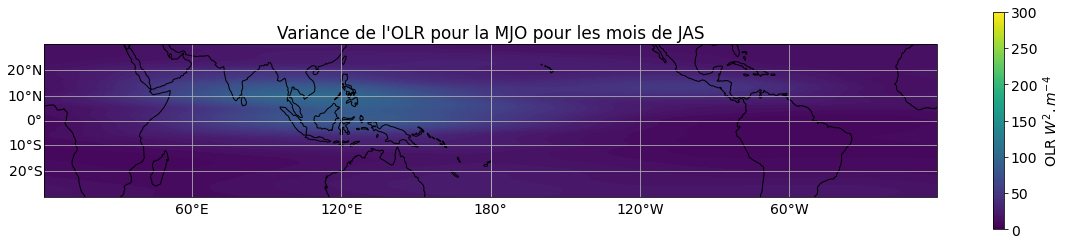

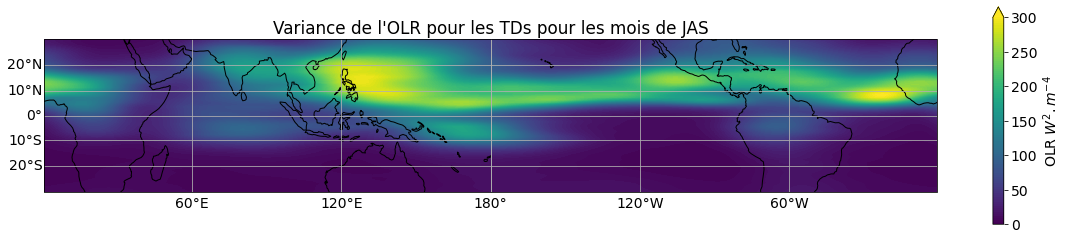

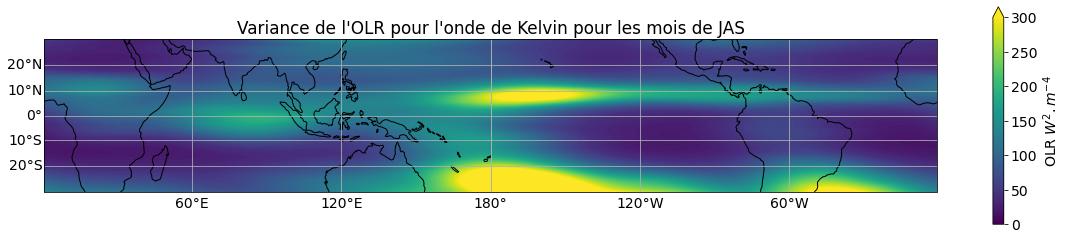

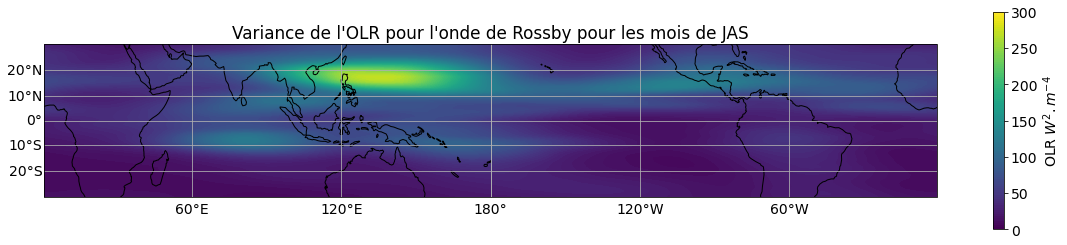

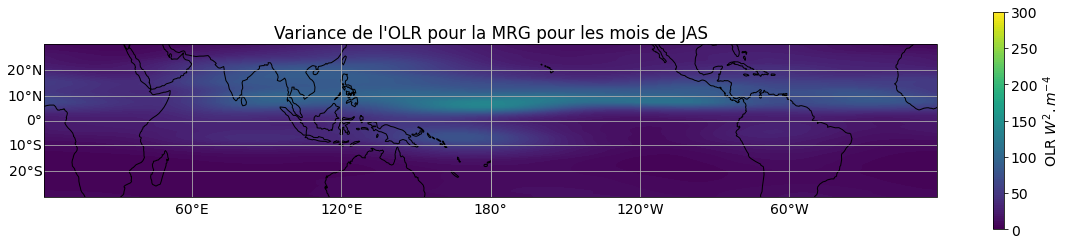

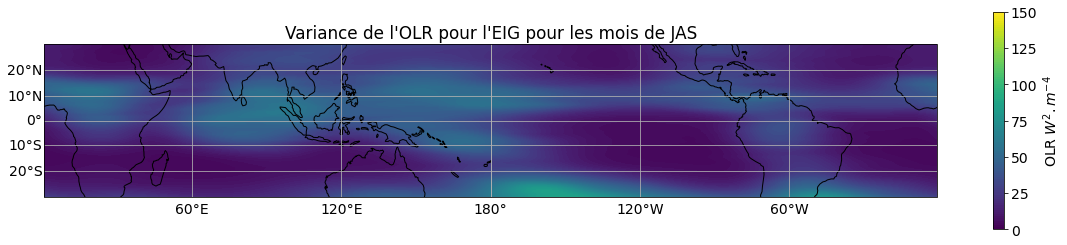

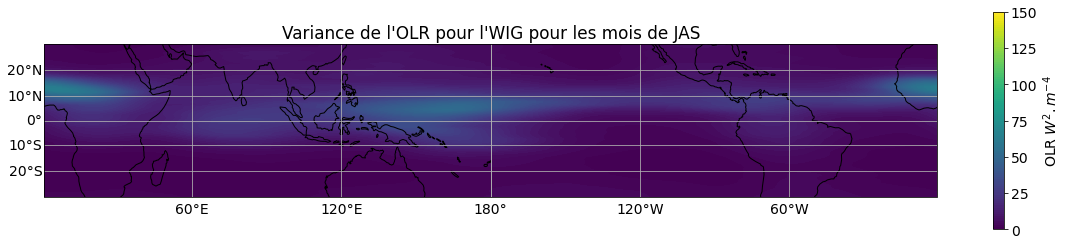

In [13]:
# plt.rc("figure", figsize=(20,14))
vmin, vmax = 0, 150*2
levelsT = np.linspace(0,vmax,7)
    
colorbar = {'label': 'OLR $W^{2}.m^{-4}$',
            'orientation': 'vertical' ,
            'extend' : 'both',
           'ticks': levelsT}
#####################################################################################
fig, axis = plt.subplots( 1, 1, 
    figsize=(20,4), subplot_kw={'projection': map_proj})

_ds_plot['OLR_MJO'].plot.contourf(ax=axis, levels = 101, vmin = vmin, vmax = vmax,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap ,
                    cbar_kwargs=colorbar)

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title("Variance de l'OLR pour la MJO pour les mois de JAS")

#####################################################################################
# plt.rc("figure", figsize=(20,14))
vmin, vmax = 0, 300

fig, axis = plt.subplots( 1, 1, 
    figsize=(20,4), subplot_kw={'projection': map_proj})

_ds_plot['OLR_TD'].plot.contourf(ax=axis, levels = 101, vmin = vmin, vmax = vmax,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap ,
                    cbar_kwargs=colorbar)

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title("Variance de l'OLR pour les TDs pour les mois de JAS")

#####################################################################################
# plt.rc("figure", figsize=(20,14))
vmin, vmax = 0, 300

fig, axis = plt.subplots( 1, 1, 
    figsize=(20,4), subplot_kw={'projection': map_proj})

_ds_plot['OLR_Kelvin'].plot.contourf(ax=axis, levels = 101, vmin = vmin, vmax = vmax,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap ,
                    cbar_kwargs=colorbar)

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title("Variance de l'OLR pour l'onde de Kelvin pour les mois de JAS")

#####################################################################################
# plt.rc("figure", figsize=(20,14))
vmin, vmax = 0, 300

fig, axis = plt.subplots( 1, 1, 
    figsize=(20,4), subplot_kw={'projection': map_proj})

_ds_plot['OLR_Rossby'].plot.contourf(ax=axis, levels = 101, vmin = vmin, vmax = vmax,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap ,
                    cbar_kwargs=colorbar)

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title("Variance de l'OLR pour l'onde de Rossby pour les mois de JAS")

#####################################################################################
vmin, vmax = 0, 300

fig, axis = plt.subplots( 1, 1, 
    figsize=(20,4), subplot_kw={'projection': map_proj})

_ds_plot['OLR_MRG'].plot.contourf(ax=axis, levels = 101, vmin = vmin, vmax = vmax,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap ,
                    cbar_kwargs=colorbar)

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title("Variance de l'OLR pour la MRG pour les mois de JAS")

#####################################################################################
vmin, vmax = 0, 150
levelsT = np.linspace(0,vmax,7)
    
colorbar = {'label': 'OLR $W^{2}.m^{-4}$',
            'orientation': 'vertical' ,
            'extend' : 'both',
           'ticks': levelsT}

fig, axis = plt.subplots( 1, 1, 
    figsize=(20,4), subplot_kw={'projection': map_proj})

_ds_plot['OLR_EIG'].plot.contourf(ax=axis, levels = 101, vmin = vmin, vmax = vmax,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap ,
                    cbar_kwargs=colorbar)

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title("Variance de l'OLR pour l'EIG pour les mois de JAS")
# plt.show()

#####################################################################################
vmin, vmax = 0, 150

fig, axis = plt.subplots( 1, 1, 
    figsize=(20,4), subplot_kw={'projection': map_proj})

_ds_plot['OLR_WIG'].plot.contourf(ax=axis, levels = 101, vmin = vmin, vmax = vmax,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap ,
                    cbar_kwargs=colorbar)

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title("Variance de l'OLR pour l'WIG pour les mois de JAS")
plt.show()

# #####################################################

In [14]:
_ds_plot = xr.open_mfdataset(indir_data_FILTERED + 'OLR_OND.nc', chunks = {'time' : 1}, parallel = True)

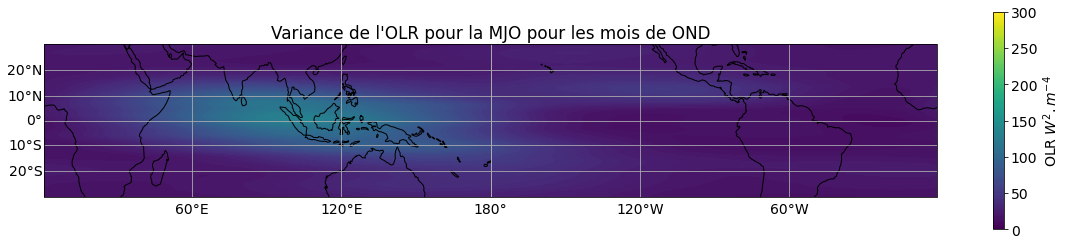

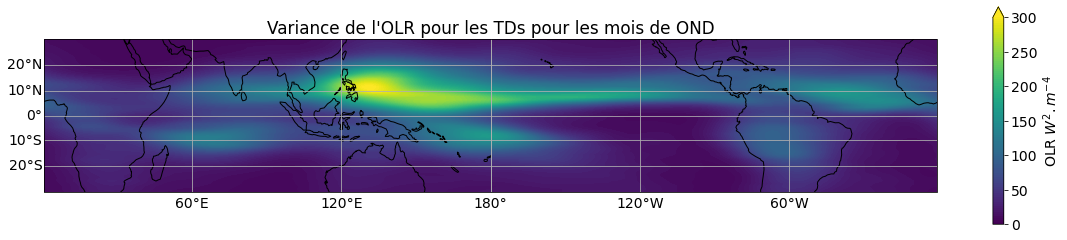

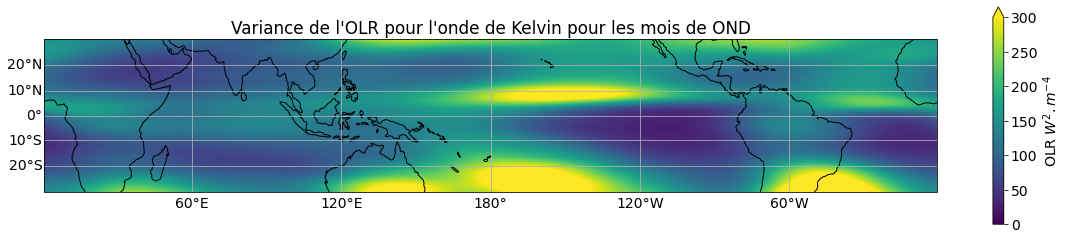

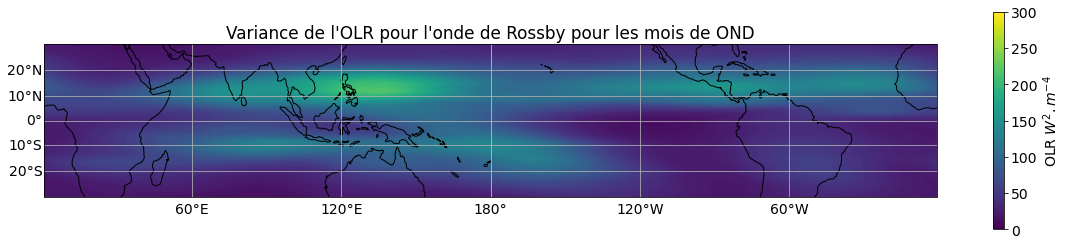

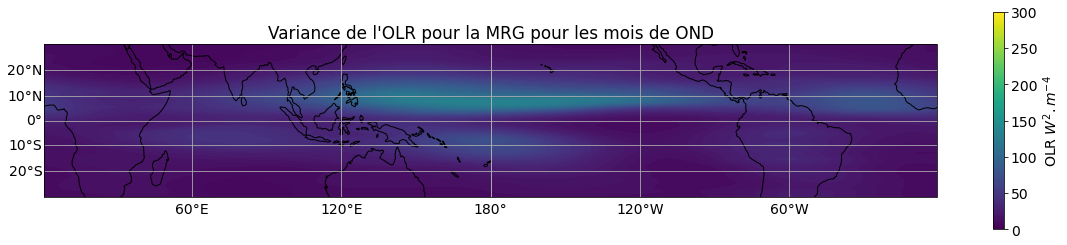

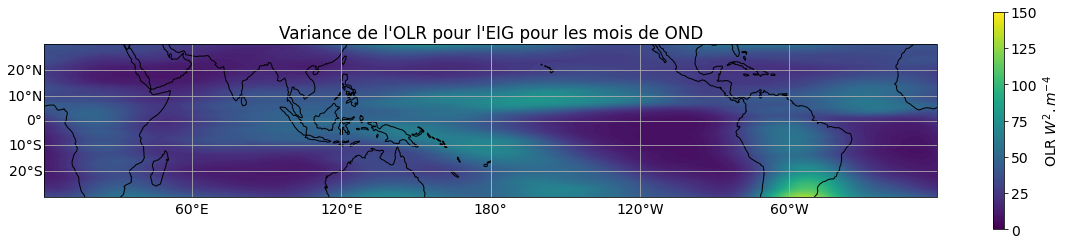

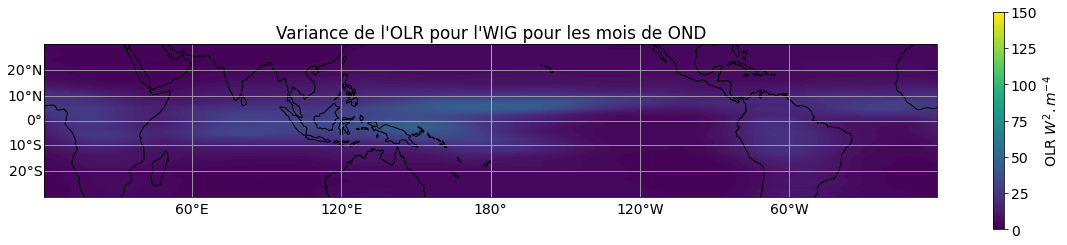

In [15]:
# plt.rc("figure", figsize=(20,14))
vmin, vmax = 0, 150*2
levelsT = np.linspace(0,vmax,7)
    
colorbar = {'label': 'OLR $W^{2}.m^{-4}$',
            'orientation': 'vertical' ,
            'extend' : 'both',
           'ticks': levelsT}
#####################################################################################
fig, axis = plt.subplots( 1, 1, 
    figsize=(20,4), subplot_kw={'projection': map_proj})

_ds_plot['OLR_MJO'].plot.contourf(ax=axis, levels = 101, vmin = vmin, vmax = vmax,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap ,
                    cbar_kwargs=colorbar)

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title("Variance de l'OLR pour la MJO pour les mois de OND")

#####################################################################################
# plt.rc("figure", figsize=(20,14))
vmin, vmax = 0, 300

fig, axis = plt.subplots( 1, 1, 
    figsize=(20,4), subplot_kw={'projection': map_proj})

_ds_plot['OLR_TD'].plot.contourf(ax=axis, levels = 101, vmin = vmin, vmax = vmax,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap ,
                    cbar_kwargs=colorbar)

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title("Variance de l'OLR pour les TDs pour les mois de OND")

#####################################################################################
# plt.rc("figure", figsize=(20,14))
vmin, vmax = 0, 300

fig, axis = plt.subplots( 1, 1, 
    figsize=(20,4), subplot_kw={'projection': map_proj})

_ds_plot['OLR_Kelvin'].plot.contourf(ax=axis, levels = 101, vmin = vmin, vmax = vmax,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap ,
                    cbar_kwargs=colorbar)

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title("Variance de l'OLR pour l'onde de Kelvin pour les mois de OND")

#####################################################################################
# plt.rc("figure", figsize=(20,14))
vmin, vmax = 0, 300

fig, axis = plt.subplots( 1, 1, 
    figsize=(20,4), subplot_kw={'projection': map_proj})

_ds_plot['OLR_Rossby'].plot.contourf(ax=axis, levels = 101, vmin = vmin, vmax = vmax,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap ,
                    cbar_kwargs=colorbar)

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title("Variance de l'OLR pour l'onde de Rossby pour les mois de OND")

#####################################################################################
vmin, vmax = 0, 300

fig, axis = plt.subplots( 1, 1, 
    figsize=(20,4), subplot_kw={'projection': map_proj})

_ds_plot['OLR_MRG'].plot.contourf(ax=axis, levels = 101, vmin = vmin, vmax = vmax,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap ,
                    cbar_kwargs=colorbar)

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title("Variance de l'OLR pour la MRG pour les mois de OND")

#####################################################################################
# plt.rc("figure", figsize=(20,14))
vmin, vmax = 0, 150
levelsT = np.linspace(0,vmax,7)
    
colorbar = {'label': 'OLR $W^{2}.m^{-4}$',
            'orientation': 'vertical' ,
            'extend' : 'both',
           'ticks': levelsT}
fig, axis = plt.subplots( 1, 1, 
    figsize=(20,4), subplot_kw={'projection': map_proj})

_ds_plot['OLR_EIG'].plot.contourf(ax=axis, levels = 101, vmin = vmin, vmax = vmax,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap ,
                    cbar_kwargs=colorbar)

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title("Variance de l'OLR pour l'EIG pour les mois de OND")
# plt.show()

#####################################################################################
# plt.rc("figure", figsize=(20,14))
vmin, vmax = 0, 150

fig, axis = plt.subplots( 1, 1, 
    figsize=(20,4), subplot_kw={'projection': map_proj})

_ds_plot['OLR_WIG'].plot.contourf(ax=axis, levels = 101, vmin = vmin, vmax = vmax,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap ,
                    cbar_kwargs=colorbar)

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title("Variance de l'OLR pour l'WIG pour les mois de OND")
plt.show()